# Credit Score System


A bank's consumer credit department wants to automate the decision-making process for approving home equity credit limits. To achieve this, an empirically generated and statistically robust credit scoring model will be developed. At the same time, the recommendations of the Equal Credit Opportunity Act must not be disregarded. The model will be created based on data collected from the current credit underwriting process and from the most recent applicants who were granted credit.

## About the Dataset

The Home Equity dataset (HMEQ) contains information about the current status and credit performance of 5,960 new home equity loans. The target variable (BAD) is a binary variable that indicates whether an applicant eventually defaulted or became seriously delinquent. This negative outcome occurred in 1,189 cases (20%). Twelve input variables were recorded for each applicant.		   

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv("hmeq.csv")
df_i = pd.read_csv("hmeq.csv")

In [5]:
df.head() 

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


# Understanding the Data

In [6]:
df.shape

(5960, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [8]:
df.describe()   #Data Distribution
                #Anomaly Detection
                #There are no anomalies in the data

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [9]:
df.columns  # Columns of the Data

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

# Column Explanations
• BAD: Target variable – indicates whether the credit defaulted or not.
• LOAN: Loan amount requested – total value of the requested mortgage.
• MORTDUE: Total value of the mortgaged property.
• REASON: Reason for the loan request (e.g., for a home or to consolidate existing debt).
• JOB: Occupation of the applicant.
• YOJ: Years at current job.
• DEROG: Number of major delinquencies in the past.
• DELINQ: Number of delinquent (unpaid) loans.
• CLAGE: Age of the oldest credit line (in months).
• NINQ: Number of recent credit inquiries.
• CLNO: Number of credit lines.
• DEBTINC: Debt-to-income ratio.

### Distributions of Various Elements

1. Credit Score Distribution  
   - The spread of credit scores across all applicants. This helps assess the range of creditworthiness within the dataset.

2. Age Distribution  
   - The distribution of ages among applicants. This reveals the age demographics of those seeking loans.

3. Gender Distribution  
   - The proportion of male and female applicants. This provides insight into the gender breakdown of applicants.

4. Marital Status Distribution  
   - The percentage of applicants who are single, married, or divorced. It indicates how marital status relates to loan applications.

5. Education Level Distribution  
   - The distribution of applicants based on their highest completed education level. It shows the relationship between education and creditworthiness.

6. Years Employed Distribution  
   - The spread of years of employment among applicants. This gives insight into their job stability and work history.

7. Home Ownership Distribution  
   - The proportion of applicants who own, rent, or have a mortgage on their home. It reflects housing status in relation to loan approval.

8. Car Ownership Distribution  
   - The number of applicants who own a car versus those who don’t. This may correlate with their financial stability.

9. Current Balance Distribution  
   - The distribution of the current credit balance held by applicants. This reflects their outstanding financial obligations.

10. Property Value Distribution  
   - The range of property values provided by applicants. It helps assess their financial standing and assets.

11. Credit Usage Distribution  
   - The spread of credit usage ratios, showing how much of their available credit applicants are utilizing.


In [10]:
print(df["BAD"].value_counts())      # Distribution of the "BAD" target variable
df["BAD"].value_counts().plot("barh")  # The target class is slightly imbalanced. 0s make up 80%, while 1s account for 20%

0    4771
1    1189
Name: BAD, dtype: int64


TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.

In [ ]:
print(df["REASON"].value_counts()) # This is a nominal value, and we should transform it into a usable format

In [ ]:
print(df["JOB"].value_counts()) # As mentioned above, we should transform it into a format we can use

In [ ]:
 df["LOAN"].plot.hist(bins = 20,figsize=(15,7.5))  # Distribution of the credit variable
 #The density is high between 10,000 and 30,000

<AxesSubplot:ylabel='Frequency'>

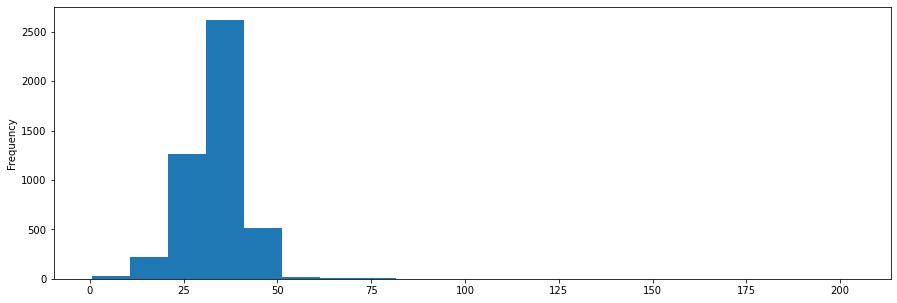

In [11]:
df["DEBTINC"].plot.hist(bins = 20,figsize=(15,5)) # The density is high around 25–50

<AxesSubplot:ylabel='Frequency'>

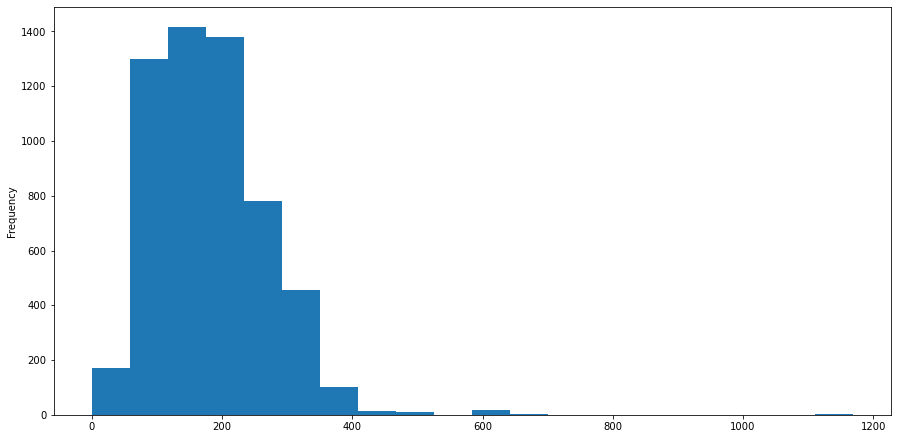

In [12]:
df["CLAGE"].plot.hist(bins = 20,figsize=(15,7.5)) # The density is high around 100–300
# By clipping values (e.g., >= 600), we can achieve better results

<AxesSubplot:ylabel='Frequency'>

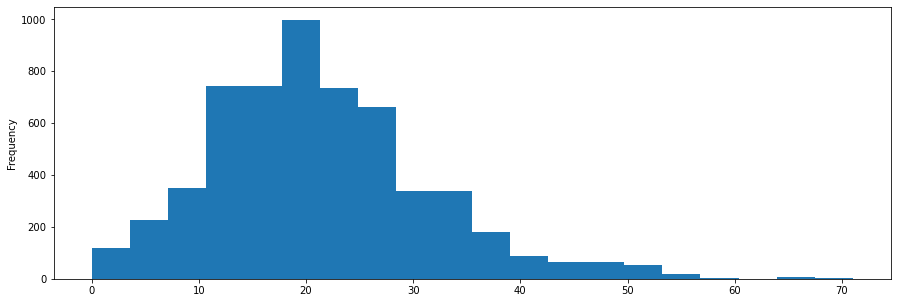

In [13]:
df["CLNO"].plot.hist(bins = 20,figsize=(15,5)) # Since the distribution looks good, there is no need to make any changes here

<AxesSubplot:ylabel='Frequency'>

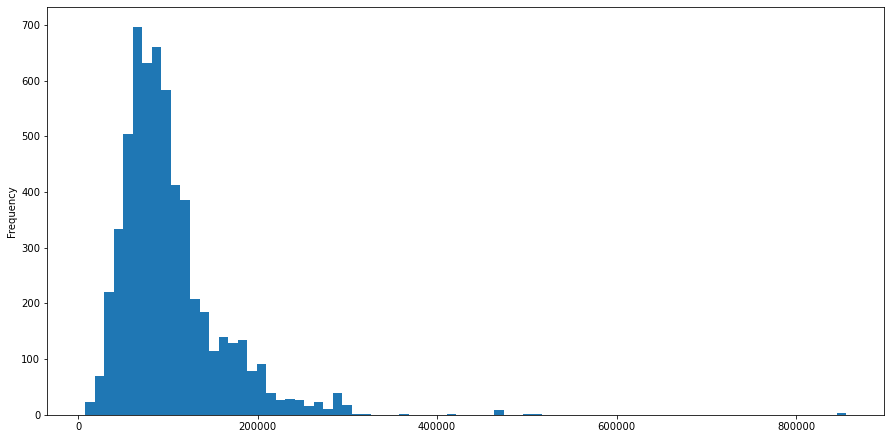

In [14]:
df["VALUE"].plot.hist(bins = 80,figsize=(15,7.5))  # The density is high around 80,000–100,000

# There are low values towards the end (>= 400,000)

# There are very few values that are somewhat higher than the average; we can cap these

<AxesSubplot:ylabel='Frequency'>

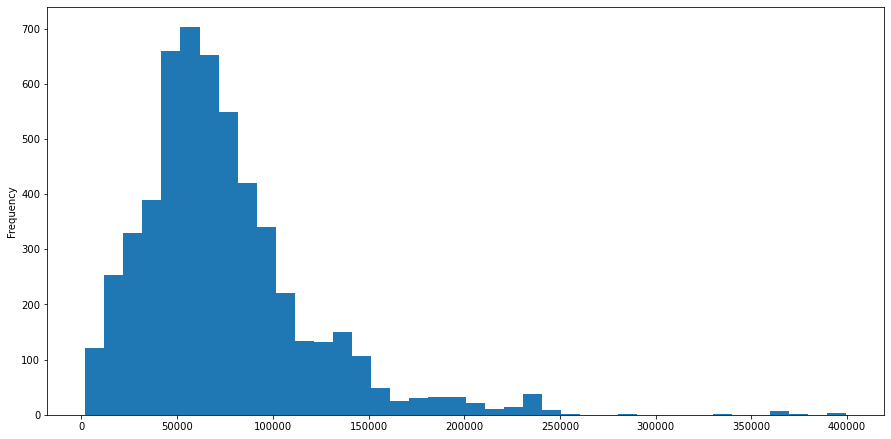

In [15]:
df["MORTDUE"].plot.hist(bins = 40,figsize=(15,7.5))   # The density is high around 40,000–100,000

<AxesSubplot:ylabel='Frequency'>

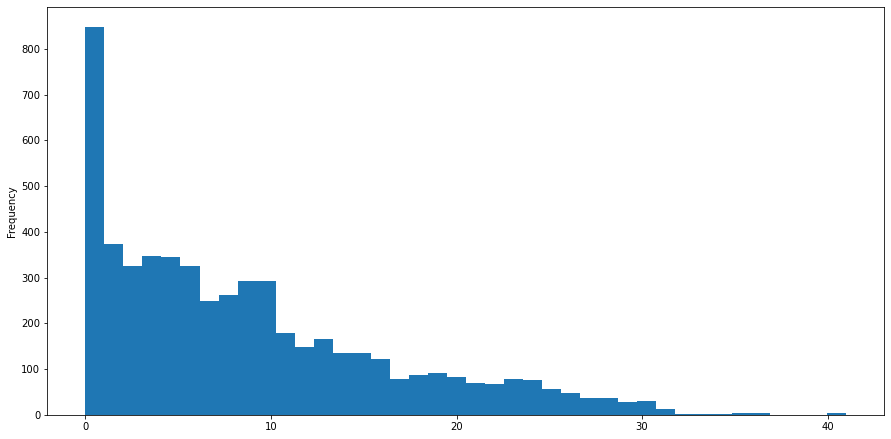

In [16]:
df["YOJ"].plot.hist(bins = 40,figsize=(15,7.5))
# This is highly skewed; it would be better to transform this variable to reduce the skewness


In [17]:
df["DEROG"].value_counts() # The derogatory areas were detected in only a few values

0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [18]:
df["DELINQ"].value_counts() # Most are zero

# As in the previous case, it would be useful to create a binary variable

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
10.0       2
11.0       2
15.0       1
12.0       1
13.0       1
Name: DELINQ, dtype: int64

In [19]:
df["NINQ"].value_counts() # It is mostly distributed among the first five values

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
12.0       2
13.0       2
14.0       1
17.0       1
Name: NINQ, dtype: int64

### Results:

• The distributions are good, and there are no anomalies in the data.

• DEBTINC has a large number of missing values (these will be addressed in the next section during the calculation of variables).

• The YOJ feature is highly skewed and can be transformed to reduce the skewness.

• Nominal features like JOB and REASON should be transformed into usable formats for the logistic regression model.

• DELINQ and DEROG can be split into two classes to create binary variables.

• VALUE, NEED, and DEBT can be capped, meaning very high values are adjusted to a lower chosen value.

## Placing the Input Variables

In [25]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON        0
JOB           0
YOJ         515
DEROG         0
DELINQ        0
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [26]:
# Nominal Variables

# Replacing with the majority class

# For the JOB variable, the majority class is Other

# For the REASON variable, the majority class is DebtCon

df["REASON"].fillna(value = "DebtCon",inplace = True)
df["JOB"].fillna(value = "Other",inplace = True)

In [27]:
df["DEROG"].fillna(value=0,inplace=True)
df["DELINQ"].fillna(value=0,inplace=True)

In [33]:
# Checking for anything missed

# As you can see, all missing values have been filled

df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

### Final View After Filling Missing Values

In [34]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915


# Applying Models to the Data After Imputation

Applying basic classification after transformation/imputation. Let's check the performance by applying both Logistic Regression and Decision Tree algorithms. Before applying the algorithms, the data will be split into training and testing sets with a 2:1 ratio, meaning 33% for testing and 67% for training. Additionally, all columns except JOB and REASON will be used as input features (since they are nominal features, they will need to be transformed into usable formats in the next section)

In [39]:
# Importing the Modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# BAD,JOB,REASON Removing Features from the Input Set
x_basic = df.drop(columns=["BAD","JOB","REASON"])
y = df["BAD"]

# Splitting the Data into Training and Testing Sets
x_basic_tr,x_basic_te,y_tr,y_te = train_test_split(x_basic,y,test_size =.33,random_state=1)
logreg_basic = LogisticRegression()

# Training the Logistic Regression Model with the Training Set
logreg_basic.fit(x_basic_tr,y_tr)

# Printing the Coefficients of the Logistic Regression Model
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)

# Predicting Test Set Outcomes Using the Trained Logistic Regression Model
y_pre = logreg_basic.predict(x_basic_te)

print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

intercept 
[-1.59627066e-05]

coefficients 
[[-1.74585580e-05 -4.03509497e-06  2.41619806e-06 -2.45188332e-04
   6.35257531e-05  9.45516742e-05 -6.12407301e-03  6.99725625e-05
  -2.10155129e-04 -1.50331853e-04]]
accuracy score :  0.7935943060498221
f1 score :  0.44246031746031744
precision score :  0.39679715302491103
recall score :  0.5


In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Bu fonksiyon, karışıklık matrisini yazdırır ve çizer.
    Normalizasyon, `normalize=True` ayarlanarak uygulanabilir.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1561    0]
 [ 406    0]]


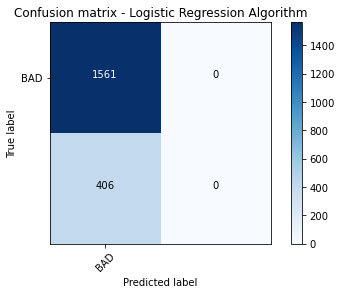

In [43]:
# Calculating the Confusion Matrix for the Logistic Regression Model

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plotting the Unnormalized Confusion Matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Logistic Regression Algorithm')

plt.show()

accuracy score :  0.8698525673614642
f1 score :  0.7945195641244949
precision score :  0.8056406437746451
recall score :  0.7849632198634827
Confusion matrix, without normalization
[[1451  110]
 [ 146  260]]


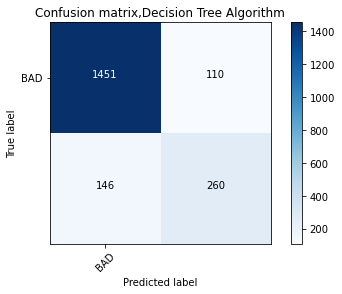

In [45]:
# Importing the Necessary Modules for Plotting
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 100
# Training the Basic Decision Tree Model with the Training Set
dectree_basic.fit(x_basic_tr,y_tr)

# Predicting the Output of the Test Cases Using the Trained Decision Tree Model
y_pre = dectree_basic.predict(x_basic_te)

# 
Yukarıda oluşturulan algoritmayı kullanarak test senaryolarının çıktısını tahmin etmek

a2 = accuracy_score(y_te,y_pre)
f2 = f1_score(y_te, y_pre, average="macro")
p2 = precision_score(y_te, y_pre, average="macro")
r2 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)

# Calculating the Confusion Matrix for the Decision Tree Model

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)


# Plotting the Unnormalized Confusion Matrix for the Decision Tree Model
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix,Decision Tree Algorithm')

plt.show()
